# Exploratory Data Analysis

## Weather

The weather data has not datetime as the other data sets, so it will be created first from the year/month/day/time columns. Then specifying datetime sa index.

In [30]:
import pandas as pd
import numpy as np

weather = pd.read_csv('weather_kumpula_012019-092022.csv')
weather = weather.rename(columns={'Vuosi': 'year', 'Kk':'month', 'Pv': 'day', 'Klo':'time'})
weather['hour'] = weather['time'].apply(lambda time: int(time[0:2]))
weather['datetime'] = pd.to_datetime(weather[['year','month','day','hour']])
weather = weather.set_index('datetime')

In [31]:
weather.tail()

,year,month,day,time,Aikavyöhyke,Pilvien määrä (1/8),Ilmanpaine (msl) (hPa),Sademäärä (mm),Suhteellinen kosteus (%),Sateen intensiteetti (mm/h),Ilman lämpötila (degC),Tuulen nopeus (m/s),hour
datetime,,,,,,,,,,,,,
2022-09-15 20:00:00,2022,9,15,20:00,UTC,7,987.4,2.5,98,0.4,10.4,1.8,20
2022-09-15 21:00:00,2022,9,15,21:00,UTC,7,987.2,2.7,100,0,11.4,3.9,21
2022-09-15 22:00:00,2022,9,15,22:00,UTC,7,986.9,0,99,0,10.4,1.2,22
2022-09-15 23:00:00,2022,9,15,23:00,UTC,8,987,0,100,0,10.3,1.4,23
2022-09-16 00:00:00,2022,9,16,00:00,UTC,7,986.9,0,100,0,10.1,0.6,0


Then replacing the empty values, expressed as '-' to np.nan. Then changing the types of columns to float. (Integer does not work with np.nan)

In [32]:
weather = weather.replace('-',np.nan)
coltypes = {'Pilvien määrä (1/8)':np.float64, 
            'Ilmanpaine (msl) (hPa)': np.float64,
            'Sademäärä (mm)' : np.float64,
            'Suhteellinen kosteus (%)': np.float64,
            'Sateen intensiteetti (mm/h)':np.float64,
            'Ilman lämpötila (degC)':np.float64,
            'Tuulen nopeus (m/s)':np.float64}

weather = weather.astype(coltypes)

In [33]:
colnames = {'Aikavyöhyke': 'time zone',
            'Pilvien määrä (1/8)': 'clouds', 
            'Ilmanpaine (msl) (hPa)': 'pressure',
            'Sademäärä (mm)' : 'rain',
            'Suhteellinen kosteus (%)': 'humidity',
            'Sateen intensiteetti (mm/h)': 'rain intensitety',
            'Ilman lämpötila (degC)': 'temperature',
            'Tuulen nopeus (m/s)': 'wind'}

weather = weather.rename(columns=colnames)

In [34]:
weather.head()

,year,month,day,time,time zone,clouds,pressure,rain,humidity,rain intensitety,temperature,wind,hour
datetime,,,,,,,,,,,,,
2019-01-01 00:00:00,2019,1,1,00:00,UTC,8.0,1000.9,0.9,97.0,1.1,0.8,7.9,0
2019-01-01 01:00:00,2019,1,1,01:00,UTC,8.0,998.7,2.2,97.0,2.4,1.5,8.5,1
2019-01-01 02:00:00,2019,1,1,02:00,UTC,8.0,996.6,1.7,98.0,0.8,2.0,9.8,2
2019-01-01 03:00:00,2019,1,1,03:00,UTC,8.0,994.2,0.3,98.0,0.0,2.4,8.9,3
2019-01-01 04:00:00,2019,1,1,04:00,UTC,8.0,992.0,0.4,98.0,0.5,2.5,7.6,4


In [35]:
weather.dtypes

year                  int64
month                 int64
day                   int64
time                 object
time zone            object
clouds              float64
pressure            float64
rain                float64
humidity            float64
rain intensitety    float64
temperature         float64
wind                float64
hour                  int64
dtype: object

<AxesSubplot:title={'center':'Temperature'}, xlabel='datetime'>

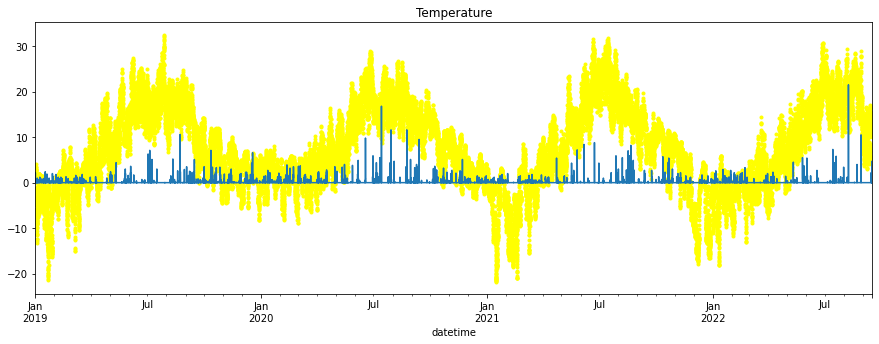

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

weather.loc[:,'temperature'].plot(ax=ax, style='.', color='yellow', figsize=(15,5), title='Temperature')
weather.loc[:,'rain'].plot(ax=ax, style='-', figsize=(15,5), title='Temperature')